# Setup

In [2]:
import os
os.chdir('..')

In [12]:
import collections
import pickle

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Analyzing the dataset

In [9]:
with open('data/processed/filtered.pickle', 'rb') as infile:
    dataset = pickle.load(infile)

In [10]:
len(dataset)

107356

In [61]:
durations = [float(game['duration']) / 60 for game in dataset]

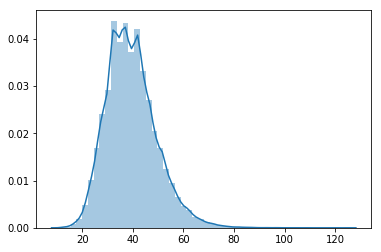

In [62]:
sns.distplot(durations)

# Heroes

In [11]:
hero_ids = [
    player['hero_id']
    for match in dataset
    for player in match['players']
]

In [30]:
hero_set = sorted(frozenset(hero_ids))

In [31]:
min(hero_set), max(hero_set)

(1, 121)

In [33]:
[i for i in range(1, 122) if i not in hero_set]

[24, 115, 116, 117, 118]

In [17]:
with open('data/metadata/heroes.pickle', 'rb') as infile:
    heroes_data = pickle.load(infile)

heroes_map = {hero['id']: hero for hero in heroes_data['heroes']}

In [38]:
heroes_map[121]

{'name': 'npc_dota_hero_grimstroke',
 'id': 121,
 'localized_name': 'Grimstroke',
 'url_small_portrait': 'http://cdn.dota2.com/apps/dota2/images/heroes/grimstroke_sb.png',
 'url_large_portrait': 'http://cdn.dota2.com/apps/dota2/images/heroes/grimstroke_lg.png',
 'url_full_portrait': 'http://cdn.dota2.com/apps/dota2/images/heroes/grimstroke_full.png',
 'url_vertical_portrait': 'http://cdn.dota2.com/apps/dota2/images/heroes/grimstroke_vert.jpg'}

In [18]:
hero_names = [heroes_map[hero_id]['localized_name'] for hero_id in hero_ids]

In [43]:
hero_counter = collections.Counter(hero_names).most_common()

In [44]:
len(hero_counter)

116

In [45]:
len(heroes_map)

116

In [46]:
hero_counter

[('Pudge', 54183),
 ('Lion', 43781),
 ('Phantom Assassin', 39548),
 ('Juggernaut', 32657),
 ('Invoker', 31518),
 ('Rubick', 31086),
 ('Slark', 27473),
 ('Sniper', 24076),
 ('Axe', 22180),
 ('Anti-Mage', 21590),
 ('Drow Ranger', 19988),
 ('Faceless Void', 19723),
 ('Earthshaker', 18188),
 ('Dazzle', 17684),
 ('Ogre Magi', 16910),
 ('Windranger', 15592),
 ('Legion Commander', 15407),
 ('Shadow Shaman', 15385),
 ('Bristleback', 15368),
 ('Mirana', 14852),
 ('Kunkka', 14613),
 ('Tinker', 14579),
 ('Zeus', 13390),
 ('Skywrath Mage', 13244),
 ('Spirit Breaker', 12875),
 ('Crystal Maiden', 12869),
 ('Grimstroke', 12867),
 ('Monkey King', 12866),
 ('Riki', 12263),
 ('Shadow Fiend', 12225),
 ('Huskar', 11933),
 ('Bounty Hunter', 11813),
 ('Slardar', 10883),
 ('Lich', 10517),
 ('Magnus', 9603),
 ('Morphling', 9587),
 ('Necrophos', 9365),
 ('Silencer', 9342),
 ('Troll Warlord', 9035),
 ('Tusk', 8656),
 ('Bloodseeker', 8469),
 ('Medusa', 8439),
 ('Wraith King', 8326),
 ('Storm Spirit', 8259),
 ('L

# Items

In [47]:
with open('data/metadata/items.pickle', 'rb') as infile:
    item_data = pickle.load(infile)

items_map = {item['id']: item for item in item_data['items']}

In [53]:
item_ids = [
    player[f'item_{n}']
    for match in dataset
    for player in match['players']
    for n in range(0, 6)
    if player[f'item_{n}'] != 0
]

In [54]:
item_names = [items_map[i]['localized_name'] for i in item_ids]

In [60]:
collections.Counter(item_ids)[46]

0

In [55]:
item_counter = collections.Counter(item_names)

In [56]:
item_counter.most_common()

[('Power Treads', 359934),
 ('Blink Dagger', 292479),
 ('Magic Wand', 254910),
 ('Wraith Band', 245018),
 ('Tranquil Boots', 186358),
 ("Aghanim's Scepter", 167320),
 ('Phase Boots', 162724),
 ('Arcane Boots', 160075),
 ('Black King Bar', 149416),
 ('Null Talisman', 146197),
 ('Blade Mail', 123280),
 ('Shadow Blade', 114471),
 ('Dust of Appearance', 107712),
 ('Stout Shield', 99551),
 ('Boots of Travel', 93532),
 ('Aether Lens', 85681),
 ('Battle Fury', 81310),
 ("Eul's Scepter of Divinity", 80430),
 ('Bracer', 80411),
 ('Manta Style', 76719),
 ('Boots of Speed', 76405),
 ('Desolator', 70873),
 ('Force Staff', 69418),
 ('Bottle', 63651),
 ('Quelling Blade', 62928),
 ('Maelstrom', 61306),
 ('Observer and Sentry Wards', 59342),
 ('Monkey King Bar', 58922),
 ('Echo Sabre', 57177),
 ('Sange and Yasha', 49361),
 ('Silver Edge', 48852),
 ('Glimmer Cape', 47158),
 ('Skull Basher', 46475),
 ("Linken's Sphere", 45301),
 ('Soul Ring', 45188),
 ('Hand of Midas', 45185),
 ('Hurricane Pike', 44529)